In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/best-selling-manga/best-selling-manga.csv


In [2]:
manga_df=pd.read_csv("/kaggle/input/best-selling-manga/best-selling-manga.csv")
manga_df

,Manga series,Author(s),Publisher,Demographic,No. of collected volumes,Serialized,Approximate sales in million(s),Average sales per volume in million(s)
0,One Piece,Eiichiro Oda,Shueisha,Shōnen,104,1997–present,516.6,4.97
1,Golgo 13,"Takao Saito, Saito Production",Shogakukan,Seinen,207,1968–present,300.0,1.45
2,Case Closed / Detective Conan,Gosho Aoyama,Shogakukan,Shōnen,102,1994–present,270.0,2.65
3,Dragon Ball,Akira Toriyama,Shueisha,Shōnen,42,1984–1995,260.0,6.19
4,Doraemon,Fujiko F. Fujio,Shogakukan,Children,45,1969–1996,250.0,4.71
...,...,...,...,...,...,...,...,...
182,Sukeban Deka,Shinji Wada,Hakusensha,Shōjo,22,1976–1982,20.0,0.90
183,Swan,Kyoko Ariyoshi,Shueisha,Shōjo,21,1976–1981,20.0,0.95
184,The Tale of Genji,Waki Yamato,Kodansha,Shōjo,13,1980–1993,20.0,1.53
185,Tokyo Daigaku Monogatari,Tatsuya Egawa,Shogakukan,Seinen,34,1992–2001,20.0,0.58


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: >

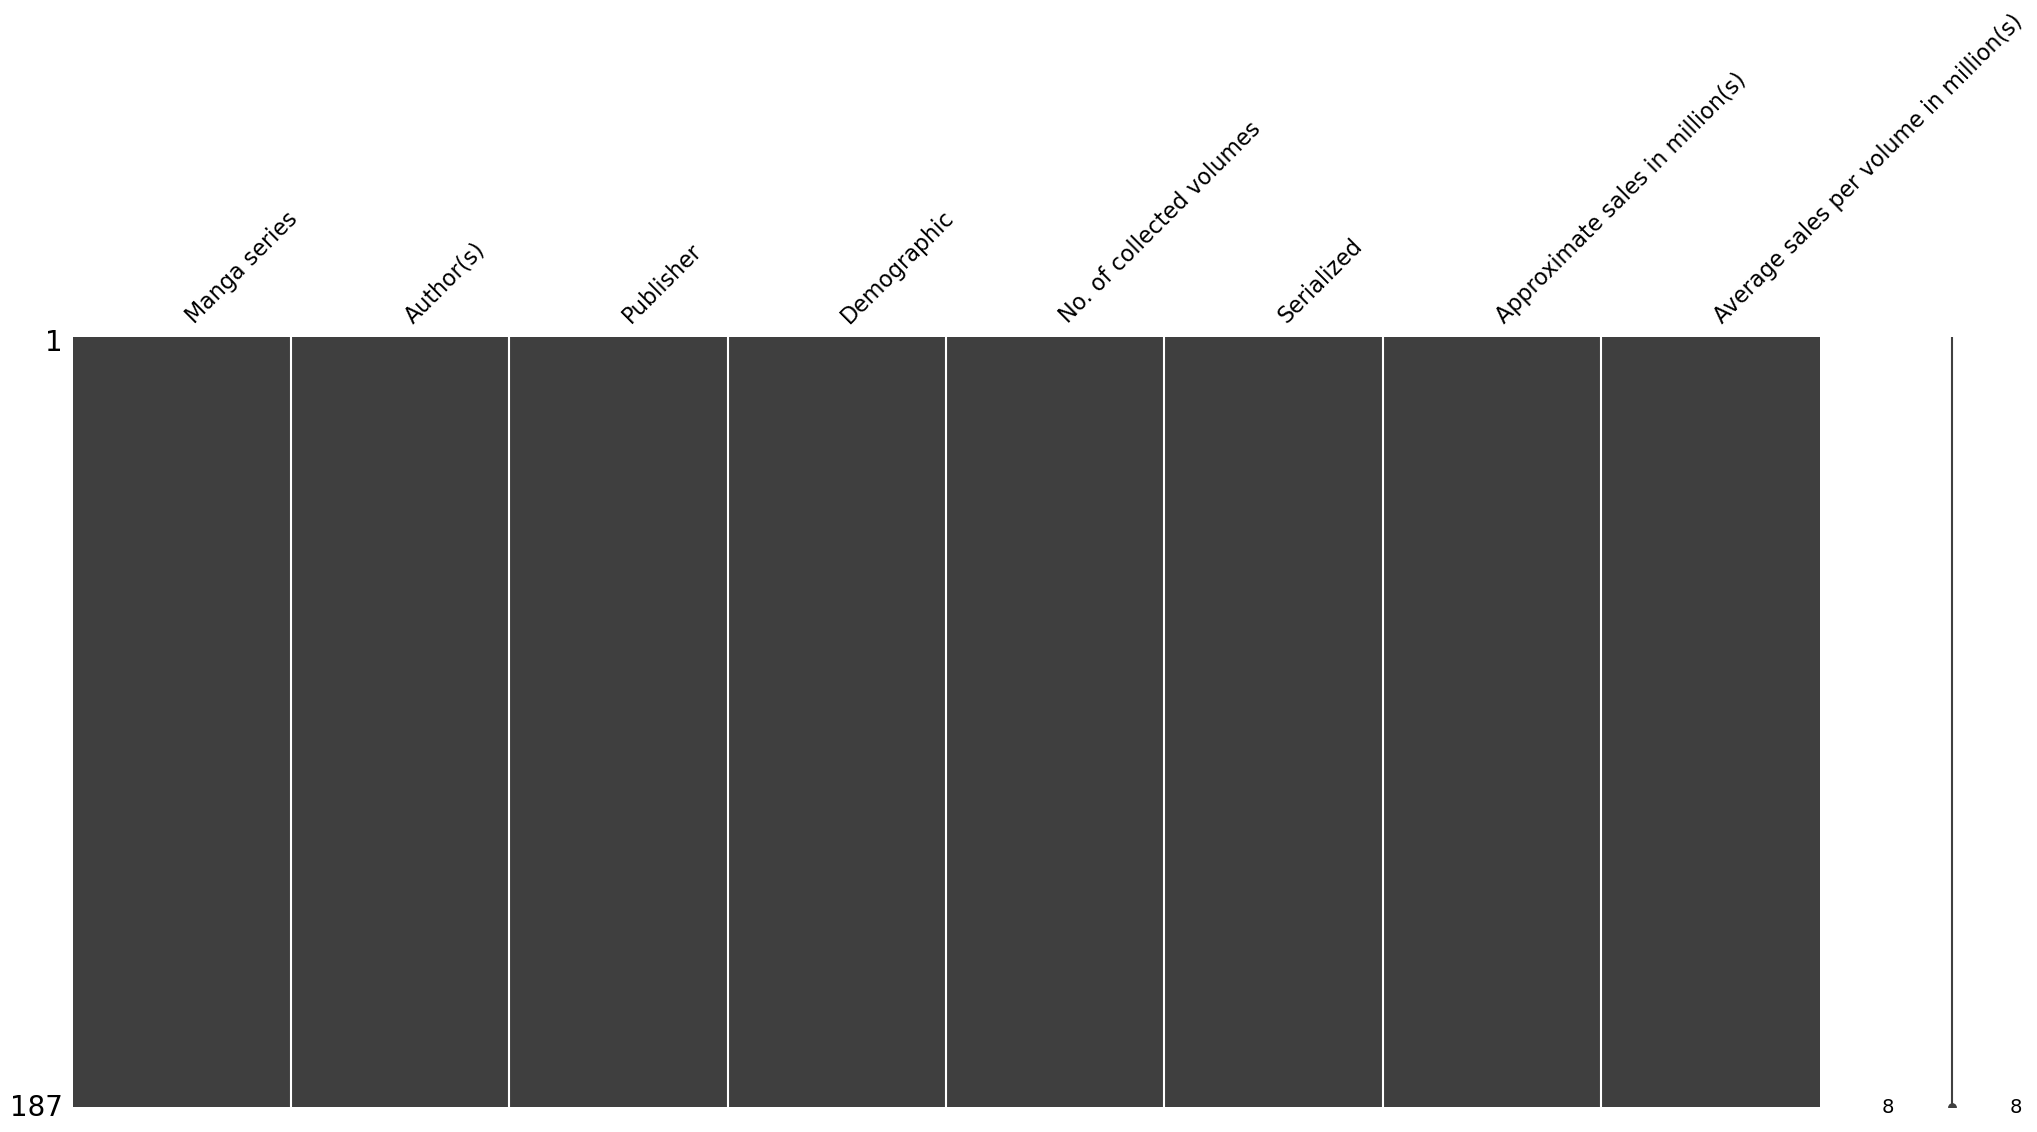

In [3]:
import missingno as msno

# check for missing values
msno.matrix(manga_df)

In [4]:

demographic_counts = manga_df['Demographic'].value_counts()
print(demographic_counts)

Shōnen                101
Seinen                 50
Shōjo                  21
Shōnen/Seinen           6
Children                4
Josei                   2
—                       1
Shōjo/Josei             1
Shōnen/shōjo/Josei      1
Name: Demographic, dtype: int64


**Count the number of manga series in each demographic category**

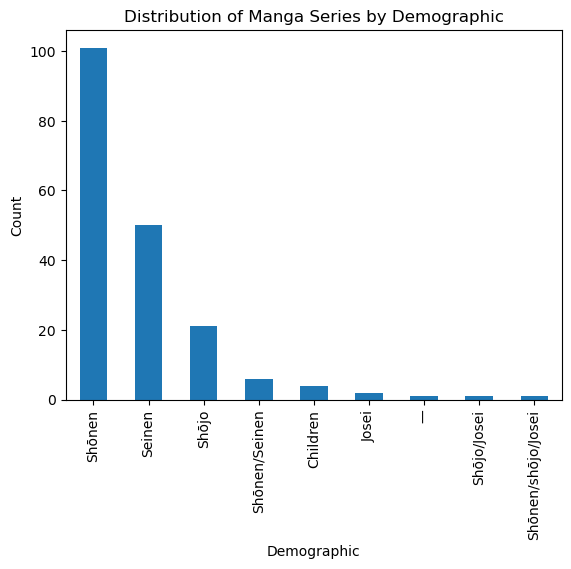

In [5]:
import matplotlib.pyplot as plt

# Assuming you have imported the demographic_counts variable from the previous step
demographic_counts.plot(kind='bar')
plt.xlabel('Demographic')
plt.ylabel('Count')
plt.title('Distribution of Manga Series by Demographic')
plt.show()


**Top Authors based on Total Sales**

This groups the manga series by author(s), calculates the total sales for each author, and sorts them in descending order to determine the top authors based on total sales.

In [6]:
# Assuming your dataset is stored in a DataFrame called "manga_df"
manga_df['Volume_to_Sales_Ratio'] = manga_df['Approximate sales in million(s)'] / manga_df['No. of collected volumes']
print(manga_df[['Manga series', 'Volume_to_Sales_Ratio']])


                      Manga series  Volume_to_Sales_Ratio
0                        One Piece               4.967308
1                         Golgo 13               1.449275
2    Case Closed / Detective Conan               2.647059
3                      Dragon Ball               6.190476
4                         Doraemon               5.555556
..                             ...                    ...
182                   Sukeban Deka               0.909091
183                           Swan               0.952381
184              The Tale of Genji               1.538462
185       Tokyo Daigaku Monogatari               0.588235
186                           Weed               0.333333

[187 rows x 2 columns]


In [7]:

top_authors_total_sales = manga_df.groupby('Author(s)')['Approximate sales in million(s)'].sum().sort_values(ascending=False)
print(top_authors_total_sales)


Author(s)
Eiichiro Oda                       516.6
Takao Saito, Saito Production      300.0
Akira Toriyama                     295.0
Gosho Aoyama                       270.0
Takehiko Inoue                     252.0
                                   ...  
Chie Shinohara                      20.0
Riichiro Inagaki, Yusuke Murata     20.0
Waki Yamato                         20.0
Shinji Wada                         20.0
Yūto Tsukuda, Shun Saeki            20.0
Name: Approximate sales in million(s), Length: 164, dtype: float64


**Sales Distribution**

generate a histogram to visualize the distribution of sales across the manga series.

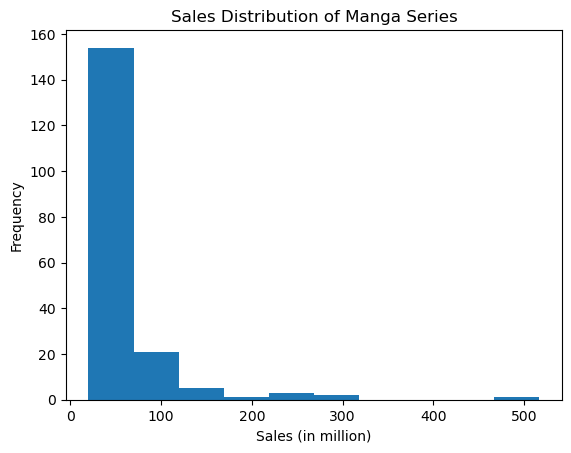

In [8]:
# Assuming your dataset is stored in a DataFrame called "manga_df"
plt.hist(manga_df['Approximate sales in million(s)'], bins=10)
plt.xlabel('Sales (in million)')
plt.ylabel('Frequency')
plt.title('Sales Distribution of Manga Series')
plt.show()


**Longevity Analysis**

This extracts the serialized years from the "Serialized" column, calculates the average lifespan, and identifies the oldest and newest series in the dataset.

In [9]:

manga_df['Years_Serialized'] = manga_df['Serialized'].str.extract(r'(\d{4})').astype(int)
average_lifespan = manga_df['Years_Serialized'].mean()
oldest_series = manga_df.loc[manga_df['Years_Serialized'].idxmin(), 'Manga series']
newest_series = manga_df.loc[manga_df['Years_Serialized'].idxmax(), 'Manga series']

print("Average Lifespan:", average_lifespan)
print("Oldest Series:", oldest_series)
print("Newest Series:", newest_series)


Average Lifespan: 1992.8181818181818
Oldest Series: Sazae-san
Newest Series: Spy × Family


**Publisher Performance**

In [10]:
# Assuming your dataset is stored in a DataFrame called "manga_df"
publisher_sales = manga_df.groupby('Publisher')['Approximate sales in million(s)'].sum().sort_values(ascending=False)
print(publisher_sales)



Publisher
Shueisha                                     4083.10
Kodansha                                     1994.33
Shogakukan                                   1855.50
Akita Shoten                                  463.00
Hakusensha                                    231.10
Nihon Bungeisha                               108.00
Kobunsha                                      100.00
Futabasha                                      88.00
Shōnen Gahōsha                                 84.00
Enix (2001–2003), Square Enix (2003–2010)      80.00
Ushio Shuppansha                               80.00
Square Enix                                    63.00
Jitsugyo no Nihon Sha                          46.00
Kadokawa Shoten                                45.00
Shueisha/Kodansha                              38.00
Shinchosha, Tokuma Shoten                      25.00
Square Enix, Ichijinsha                        25.00
Gakken                                         23.00
Enix                                

**Time-Series Analysis**

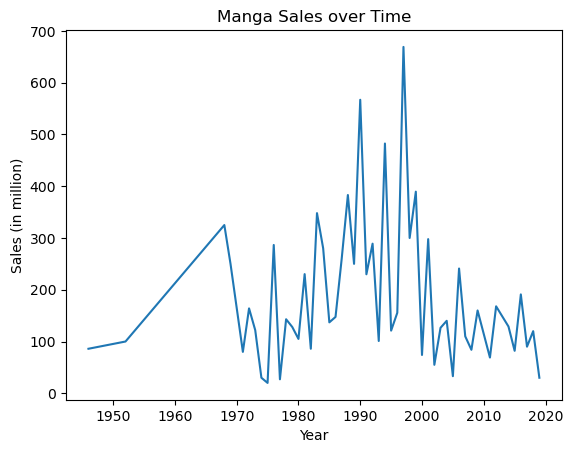

In [11]:
# Assuming your dataset is stored in a DataFrame called "manga_df" with a "Year" column
manga_df['Year'] = manga_df['Serialized'].str.extract(r'(\d{4})').astype(int)
sales_by_year = manga_df.groupby('Year')['Approximate sales in million(s)'].sum()
sales_by_year.plot()
plt.xlabel('Year')
plt.ylabel('Sales (in million)')
plt.title('Manga Sales over Time')
plt.show()


**Market Share by Publisher**

In [12]:

total_sales = manga_df['Approximate sales in million(s)'].sum()
market_share = manga_df.groupby('Publisher')['Approximate sales in million(s)'].sum() / total_sales * 100
print(market_share)


Publisher
Akita Shoten                                  4.877314
Enix                                          0.220164
Enix (2001–2003), Square Enix (2003–2010)     0.842732
Futabasha                                     0.927006
Gakken                                        0.242286
Hakusensha                                    2.434443
Jitsugyo no Nihon Sha                         0.484571
Kadokawa Shoten                               0.474037
Kobunsha                                      1.053416
Kodansha                                     21.008582
Nihon Bungeisha                               1.137689
Shinchosha, Tokuma Shoten                     0.263354
Shogakukan                                   19.546125
Shueisha                                     43.012010
Shueisha/Kodansha                             0.400298
Shueisha/Shogakukan/Leed                      0.210683
Shōnen Gahōsha                                0.884869
Square Enix                                   0.663652


**Revenue Analysis**

Calculate the total revenue generated by each manga series by multiplying the approximate sales by the average sales per volume. This analysis will give you insights into the economic performance of each series.

In [13]:

manga_df['Revenue'] = manga_df['Approximate sales in million(s)'] * manga_df['Average sales per volume in million(s)']
total_revenue = manga_df['Revenue'].sum()
print("Total Revenue:", total_revenue)


Total Revenue: 19977.935899999997


**Visualizing market share based on revenue.**

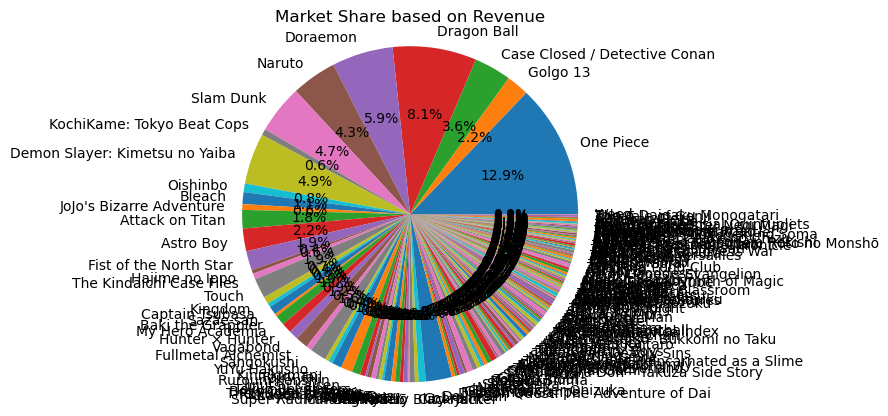

In [14]:
import matplotlib.pyplot as plt


manga_df['Revenue'] = manga_df['Approximate sales in million(s)'] * manga_df['Average sales per volume in million(s)']

# Calculate the market share based on revenue
market_share = manga_df['Revenue'] / manga_df['Revenue'].sum()

# Plotting the market share as a pie chart
plt.pie(market_share, labels=manga_df['Manga series'], autopct='%1.1f%%')
plt.title('Market Share based on Revenue')
plt.axis('equal')
plt.show()


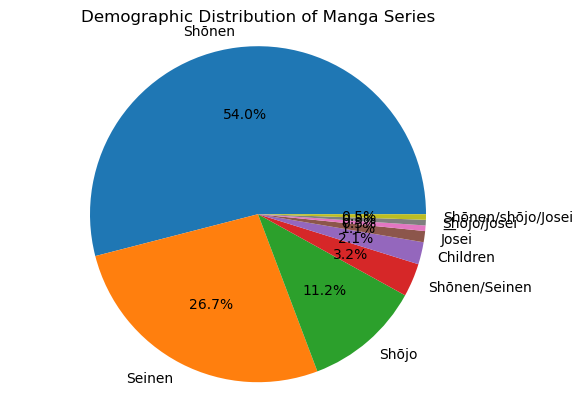

In [15]:
# Visualization: Pie chart of Demographic Distribution
demographic_counts = manga_df['Demographic'].value_counts()
plt.pie(demographic_counts, labels=demographic_counts.index, autopct='%1.1f%%')
plt.title('Demographic Distribution of Manga Series')
plt.axis('equal')
plt.show()

**Fruchterman-Reingold algorithm for graph visualization**

**Demonstrate the usage of Fruchterman-Reingold algorithm for graph visualization.**

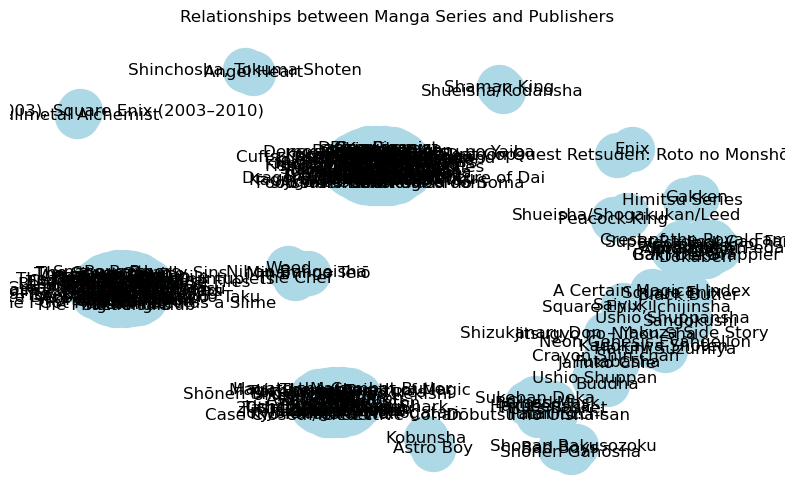

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# Add nodes (manga series) to the graph
G.add_nodes_from(manga_df['Manga series'])

# Add edges (relationships between manga series and publishers)
for _, row in manga_df.iterrows():
    G.add_edge(row['Manga series'], row['Publisher'])

# Set the Fruchterman-Reingold layout
pos = nx.fruchterman_reingold_layout(G)

# Draw the graph
plt.figure(figsize=(10, 6))
nx.draw_networkx(G, pos, with_labels=True, node_size=1000, node_color='lightblue', edge_color='gray')
plt.title('Relationships between Manga Series and Publishers')
plt.axis('off')
plt.show()


**This detects communities within the manga series and publisher graph. Each community is assigned a different color, and the resulting graph is visualized using the Fruchterman-Reingold layout.**

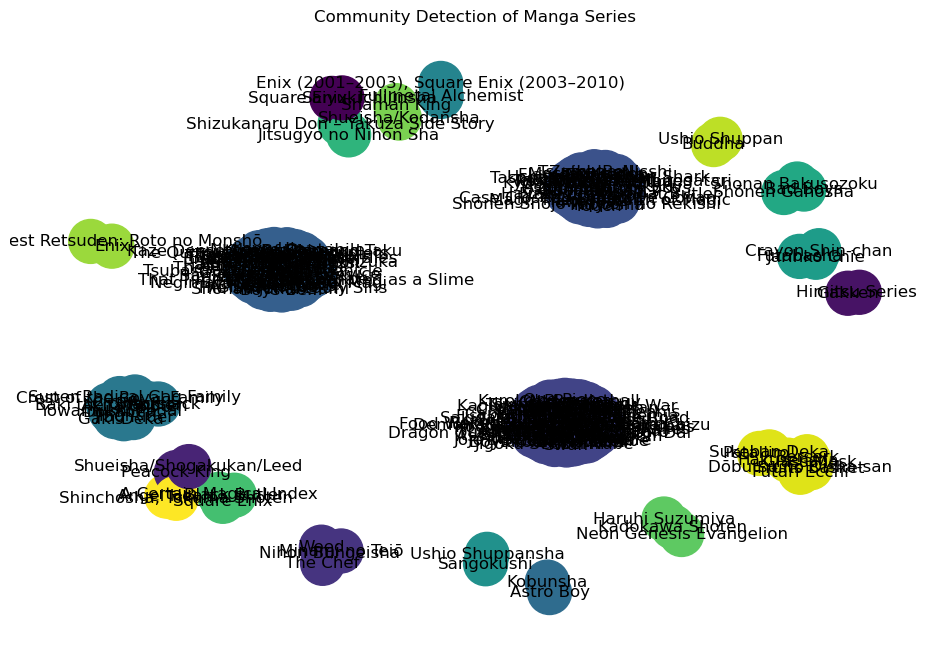

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
import community

# Create an empty graph
G = nx.Graph()

# Add nodes (manga series) to the graph
G.add_nodes_from(manga_df['Manga series'])

# Add edges (relationships between manga series and publishers)
for _, row in manga_df.iterrows():
    G.add_edge(row['Manga series'], row['Publisher'])

# Detect communities using Louvain algorithm
partition = community.best_partition(G)

# Draw the graph with community colors
plt.figure(figsize=(12, 8))
pos = nx.fruchterman_reingold_layout(G)
nx.draw_networkx(G, pos, with_labels=True, node_size=1000, node_color=list(partition.values()), cmap='viridis', edge_color='gray')
plt.title('Community Detection of Manga Series')
plt.axis('off')
plt.show()


**Calculate the total sales for each demographic category (genre) by grouping the manga series based on their genres.**

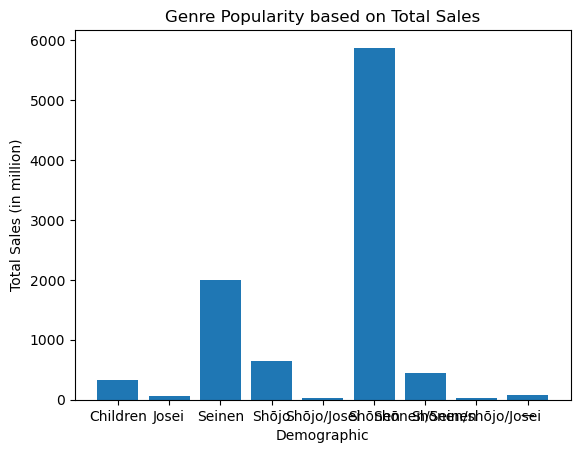

In [18]:
import matplotlib.pyplot as plt

# Calculate total sales by genre
genre_sales = manga_df.groupby('Demographic')['Approximate sales in million(s)'].sum()

# Plot genre popularity based on total sales
plt.bar(genre_sales.index, genre_sales)
plt.xlabel('Demographic')
plt.ylabel('Total Sales (in million)')
plt.title('Genre Popularity based on Total Sales')
plt.show()


**Extract the years of serialization from the "Serialized" column and plots a scatter plot to analyze the relationship between the years of serialization and the approximate sales for each manga series.**

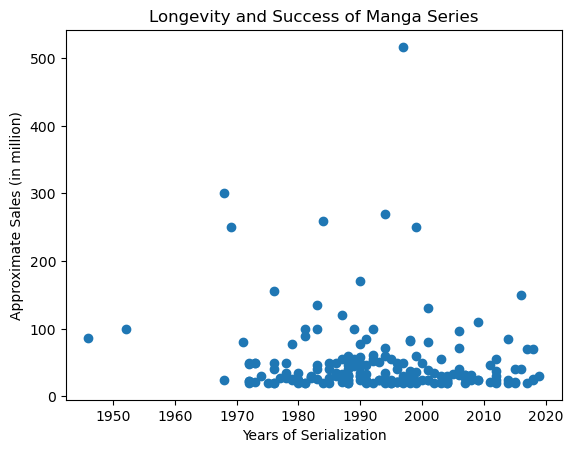

In [19]:
import matplotlib.pyplot as plt

# Calculate the years of serialization for each manga series
manga_df['Years_Serialized'] = manga_df['Serialized'].str.extract(r'(\d{4})').astype(int)

# Plot the relationship between years of serialization and sales
plt.scatter(manga_df['Years_Serialized'], manga_df['Approximate sales in million(s)'])
plt.xlabel('Years of Serialization')
plt.ylabel('Approximate Sales (in million)')
plt.title('Longevity and Success of Manga Series')
plt.show()


**Calculate the total sales for each author by grouping the manga series based on their authors.**

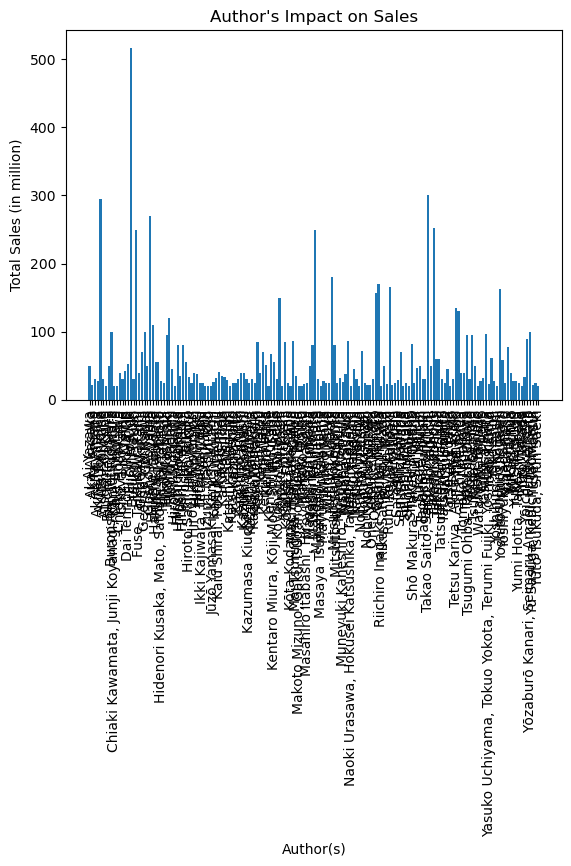

In [20]:
import matplotlib.pyplot as plt

# Calculate the total sales for each author
author_sales = manga_df.groupby('Author(s)')['Approximate sales in million(s)'].sum()

# Plot the total sales for each author
plt.bar(author_sales.index, author_sales)
plt.xlabel('Author(s)')
plt.ylabel('Total Sales (in million)')
plt.title("Author's Impact on Sales")
plt.xticks(rotation=90)
plt.show()


**plot a histogram to visualize the distribution of collected volumes across the manga series.**

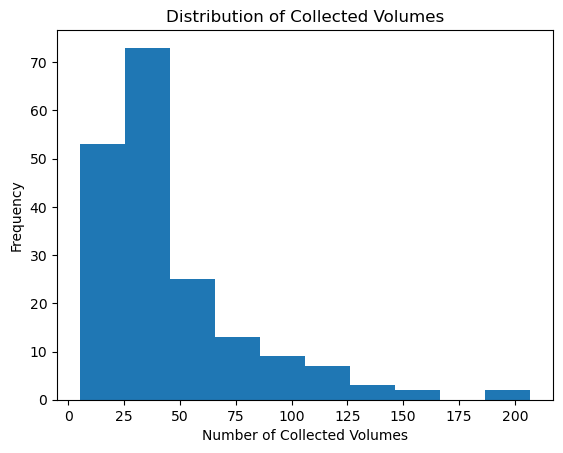

In [21]:
import matplotlib.pyplot as plt

# Plot the distribution of collected volumes
plt.hist(manga_df['No. of collected volumes'], bins=10)
plt.xlabel('Number of Collected Volumes')
plt.ylabel('Frequency')
plt.title('Distribution of Collected Volumes')
plt.show()


**Calculate the total sales for each publisher by grouping the manga series based on their publishers visualizing the total sales for each publisher using a bar plot.**

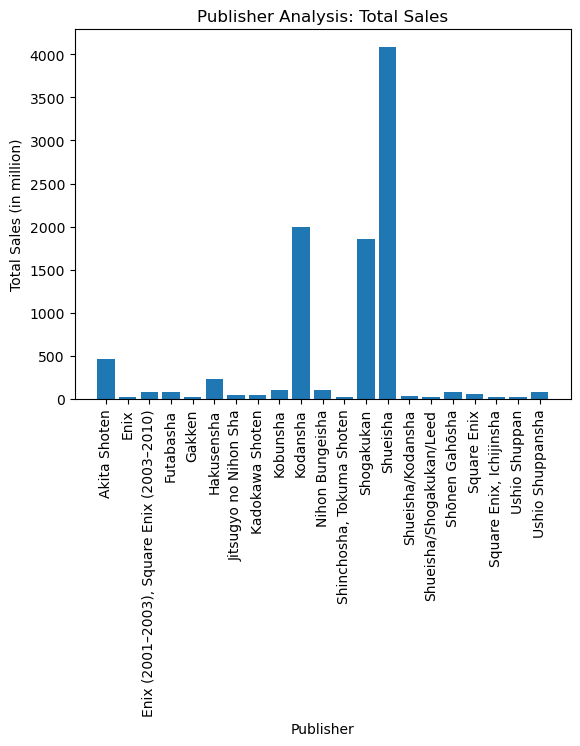

In [22]:
import matplotlib.pyplot as plt

# Calculate the total sales for each publisher
publisher_sales = manga_df.groupby('Publisher')['Approximate sales in million(s)'].sum()

# Plot the total sales for each publisher
plt.bar(publisher_sales.index, publisher_sales)
plt.xlabel('Publisher')
plt.ylabel('Total Sales (in million)')
plt.title('Publisher Analysis: Total Sales')
plt.xticks(rotation=90)
plt.show()


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare the features and target variable
X = manga_df[['No. of collected volumes', 'Average sales per volume in million(s)']]
y = manga_df['Approximate sales in million(s)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 551.4145337219686


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


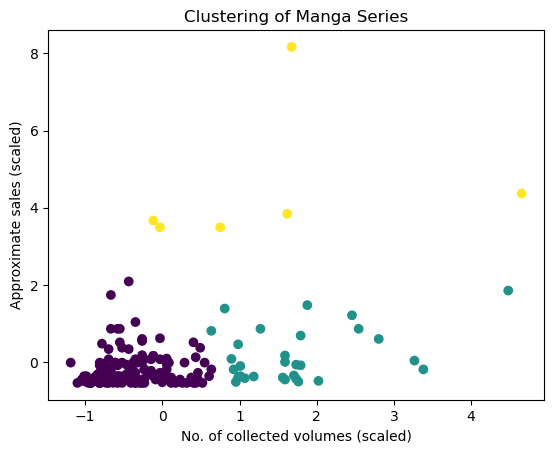

Cluster 0:
6                           Slam Dunk
8      Demon Slayer: Kimetsu no Yaiba
12                    Attack on Titan
13                          Astro Boy
14             Fist of the North Star
                    ...              
182                      Sukeban Deka
183                              Swan
184                 The Tale of Genji
185          Tokyo Daigaku Monogatari
186                              Weed
Name: Manga series, Length: 151, dtype: object
Cluster 1:
7               KochiKame: Tokyo Beat Cops
9                                 Oishinbo
10                                  Bleach
11                JoJo's Bizarre Adventure
15                          Hajime no Ippo
16                The Kindaichi Case Files
18                                 Kingdom
19                         Captain Tsubasa
21                       Baki the Grappler
28                              Kinnikuman
34                                   Major
39                                 Ginta

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Prepare the features
X = manga_df[['No. of collected volumes', 'Approximate sales in million(s)']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform clustering using K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the dataset
manga_df['Cluster'] = kmeans.labels_

# Plot the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('No. of collected volumes (scaled)')
plt.ylabel('Approximate sales (scaled)')
plt.title('Clustering of Manga Series')
plt.show()

# Print the manga series in each cluster
for cluster in range(kmeans.n_clusters):
    cluster_series = manga_df[manga_df['Cluster'] == cluster]['Manga series']
    print(f"Cluster {cluster}:")
    print(cluster_series)


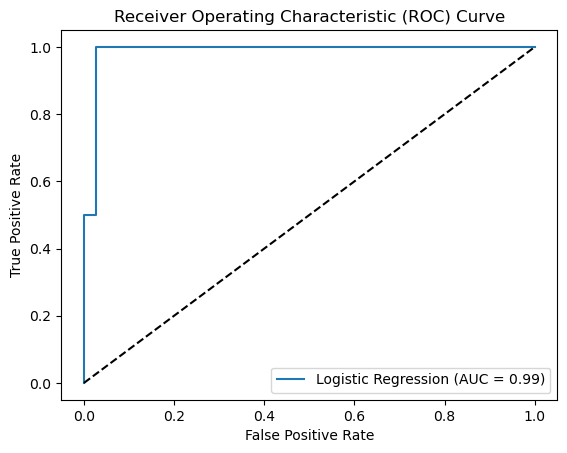

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create a binary target variable based on approximate sales
manga_df['Success'] = manga_df['Approximate sales in million(s)'] > 100  # Set threshold as 100 million

# Prepare the features and binary target variable
X = manga_df[['No. of collected volumes', 'Average sales per volume in million(s)']]
y = manga_df['Success']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities of positive class

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_proba)

# Generate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], 'k--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


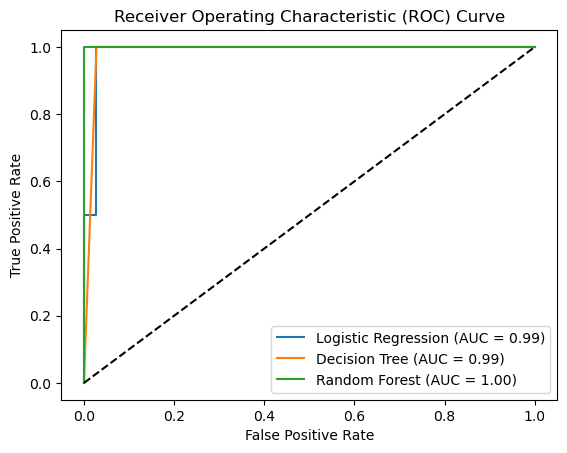

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create a binary target variable based on approximate sales
manga_df['Success'] = manga_df['Approximate sales in million(s)'] > 100  # Set threshold as 100 million

# Prepare the features and binary target variable
X = manga_df[['No. of collected volumes', 'Average sales per volume in million(s)']]
y = manga_df['Success']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
logistic_model = LogisticRegression()
tree_model = DecisionTreeClassifier(random_state=42)
forest_model = RandomForestClassifier(random_state=42)

# Fit the models
logistic_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
forest_model.fit(X_train, y_train)

# Make predictions on the test set
logistic_pred_proba = logistic_model.predict_proba(X_test)[:, 1]  # Probabilities of positive class
tree_pred_proba = tree_model.predict_proba(X_test)[:, 1]
forest_pred_proba = forest_model.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC scores
logistic_auc_roc = roc_auc_score(y_test, logistic_pred_proba)
tree_auc_roc = roc_auc_score(y_test, tree_pred_proba)
forest_auc_roc = roc_auc_score(y_test, forest_pred_proba)

# Generate ROC curves
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, logistic_pred_proba)
tree_fpr, tree_tpr, _ = roc_curve(y_test, tree_pred_proba)
forest_fpr, forest_tpr, _ = roc_curve(y_test, forest_pred_proba)

# Plot ROC curves
plt.plot(logistic_fpr, logistic_tpr, label='Logistic Regression (AUC = %0.2f)' % logistic_auc_roc)
plt.plot(tree_fpr, tree_tpr, label='Decision Tree (AUC = %0.2f)' % tree_auc_roc)
plt.plot(forest_fpr, forest_tpr, label='Random Forest (AUC = %0.2f)' % forest_auc_roc)
plt.plot([0, 1], [0, 1], 'k--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, explained_variance_score

# Prepare the features and target variable
X = manga_df[['No. of collected volumes', 'Average sales per volume in million(s)']]
y = manga_df['Approximate sales in million(s)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error:", mae)
print("R-squared:", r2)
print("Explained Variance Score:", explained_variance)


Mean Absolute Error: 14.053354026733246
R-squared: 0.7153258854529805
Explained Variance Score: 0.725111021604349
